In [2]:
import torch
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

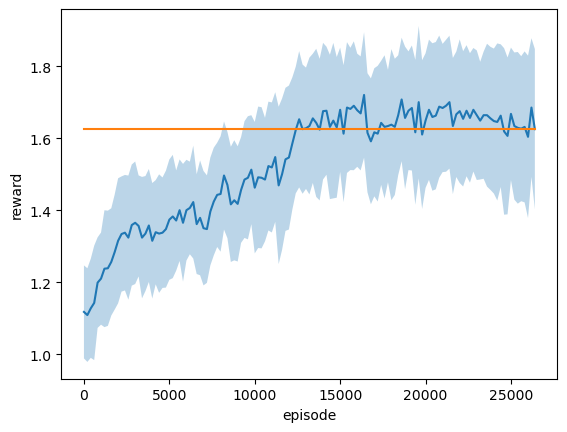

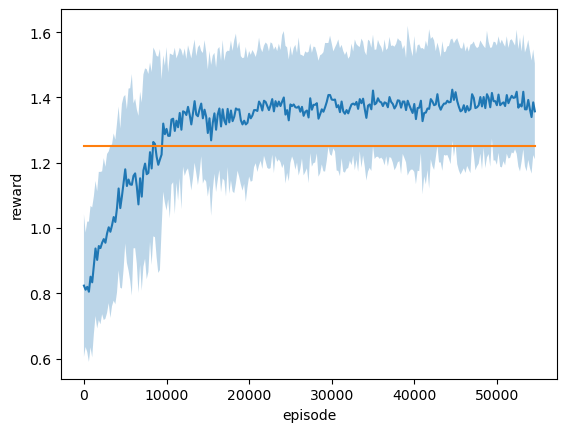

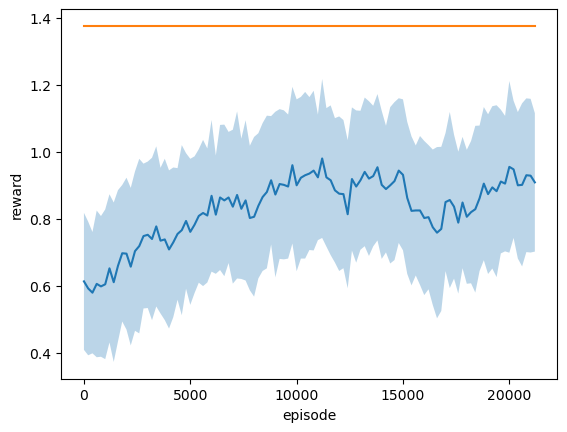

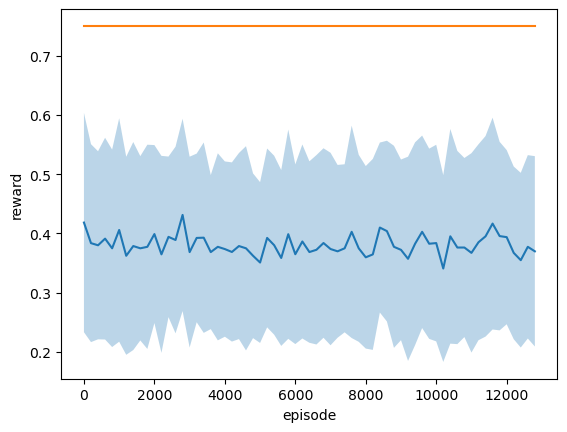

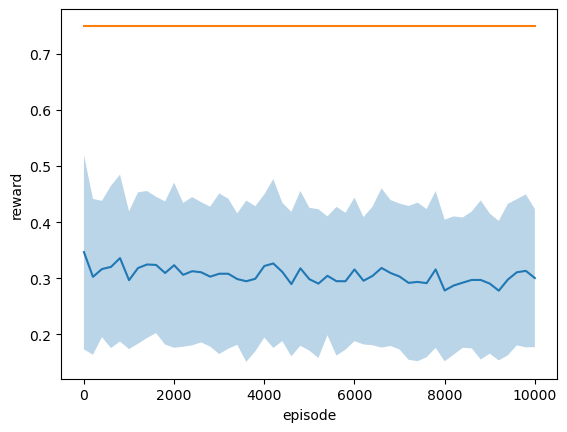

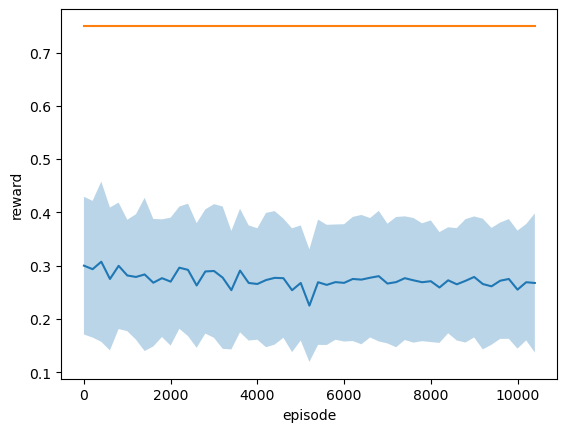

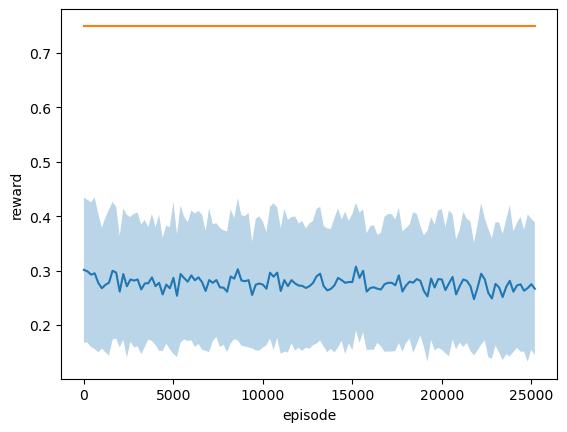

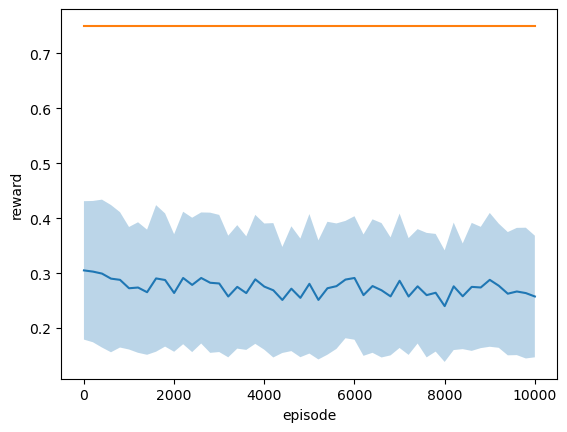

In [3]:
for i in range(1, 9):
    df = pd.read_csv(f'../result/ppo/edge_load=0.{i}_debug_info.csv')
    df.head()

    mean_rewards = df['mean_100_reward'].to_numpy()
    
    np_mean_rewards = []
    for reward in mean_rewards:
        np_mean_rewards.append(float(reward[7:-1]))
    np_mean_rewards = np.array(np_mean_rewards)

    srd_rewards = df['std_100_reward'].to_numpy()
    np_std_rewards = []
    for reward in srd_rewards:
        np_std_rewards.append(float(reward[7:-1]))
    np_std_rewards = np.array(np_std_rewards)

    np_upper_rewards = np_mean_rewards + np_std_rewards
    np_lower_rewards = np_mean_rewards - np_std_rewards

    b_df = pd.read_csv(f'../result/baseline-rule/0.{i}_debug_info.csv')
    b_mean_rewards = b_df['mean_100_reward'].to_numpy()
    b_mean_rewards = b_mean_rewards.repeat(len(np_mean_rewards))
    episodes = np.arange(len(np_mean_rewards)) * 200
    
    plt.fill_between(episodes, np_lower_rewards, np_upper_rewards, alpha=0.3)
    plt.plot(episodes, np_mean_rewards, label='mean reward')
    plt.plot(episodes, b_mean_rewards, label='baseline reward')

    plt.xlabel('episode')
    plt.ylabel('reward')
    plt.show()

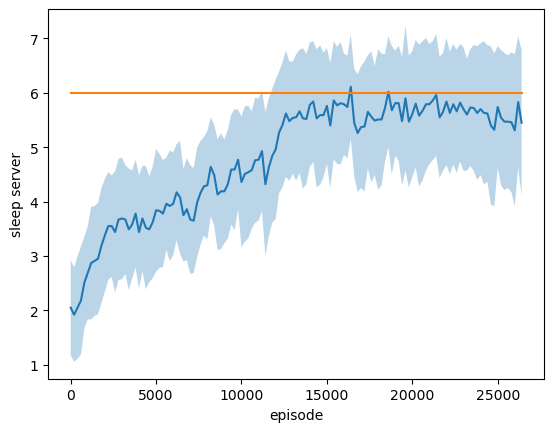

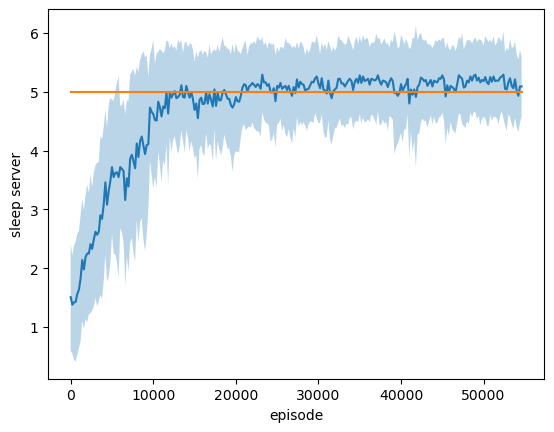

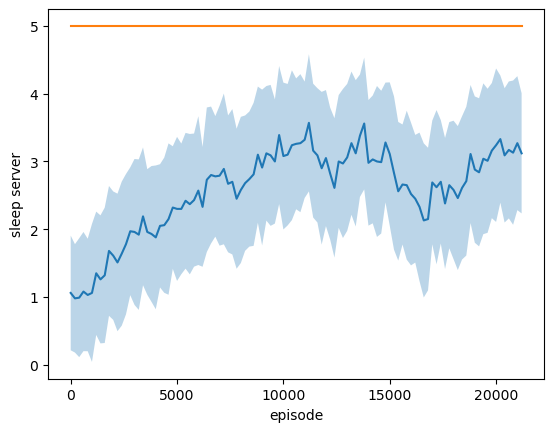

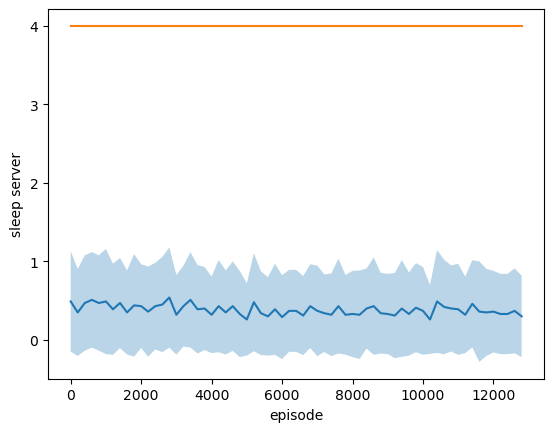

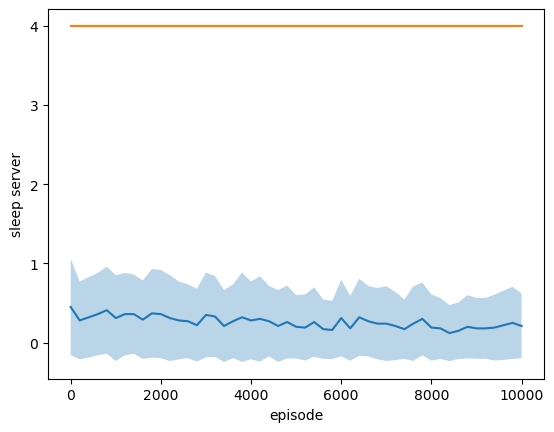

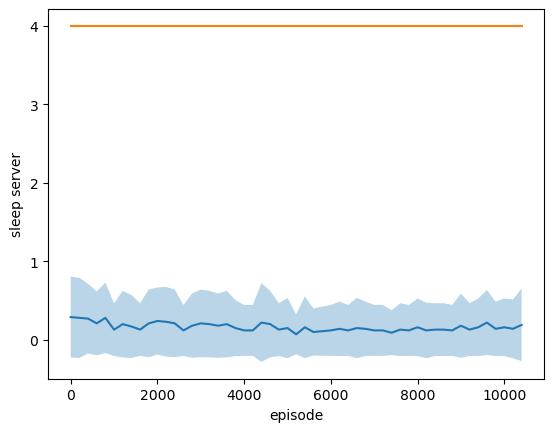

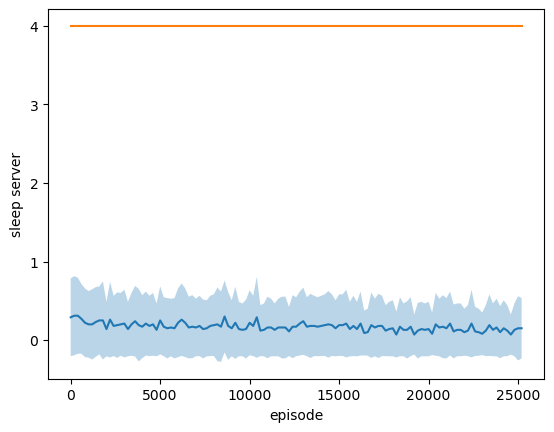

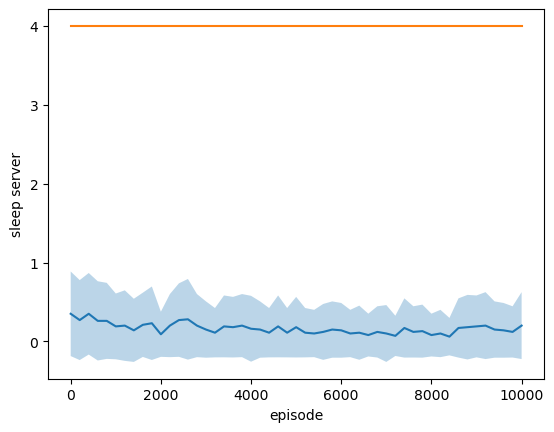

In [4]:
for i in range(1, 9):
    df = pd.read_csv(f'../result/ppo/edge_load=0.{i}_debug_info.csv')
    df.head()

    np_mean_final_slp_srv = df['mean_100_final_slp_srv'].to_numpy()
    
    np_std_final_slp_srv = df['std_100_final_slp_srv'].to_numpy()

    np_upper_final_slp_srv = np_mean_final_slp_srv + np_std_final_slp_srv
    np_lower_final_slp_srv = np_mean_final_slp_srv - np_std_final_slp_srv

    b_df = pd.read_csv(f'../result/baseline-rule/0.{i}_debug_info.csv')
    b_mean_rewards = b_df['mean_100_final_slp_srv'].to_numpy()
    b_mean_rewards = b_mean_rewards.repeat(len(np_mean_final_slp_srv))

    episodes = np.arange(len(np_mean_final_slp_srv)) * 200

    plt.fill_between(episodes, np_lower_final_slp_srv, np_upper_final_slp_srv, alpha=0.3)
    plt.plot(episodes, np_mean_final_slp_srv, label='mean sleep server')
    plt.plot(episodes, b_mean_rewards, label='baseline sleep server')

    plt.xlabel('episode')
    plt.ylabel('sleep server')

    plt.show()

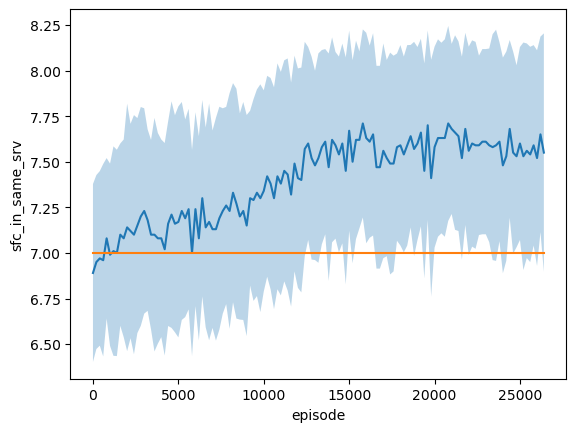

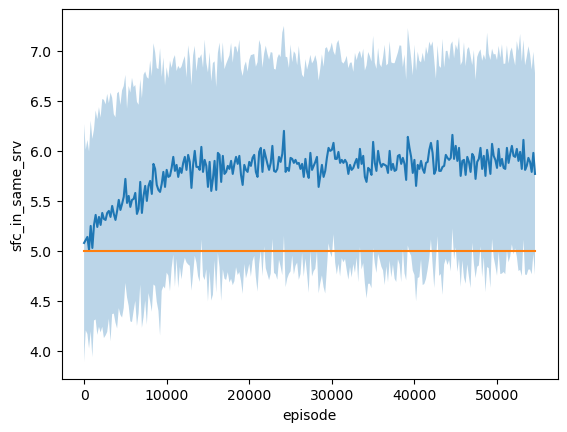

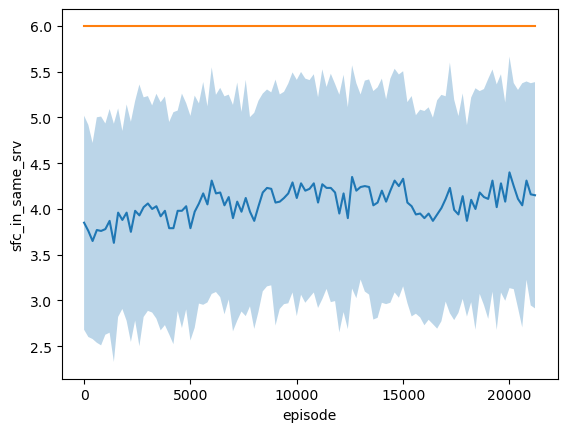

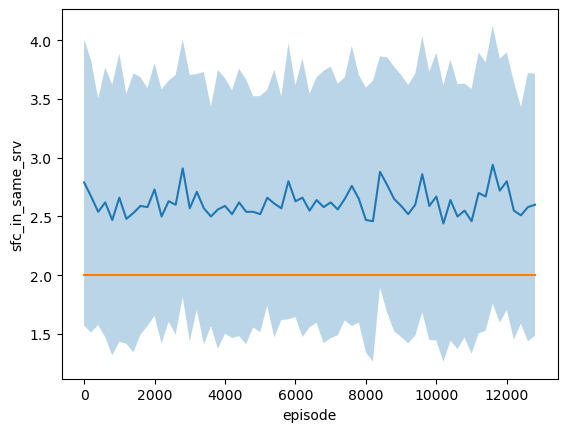

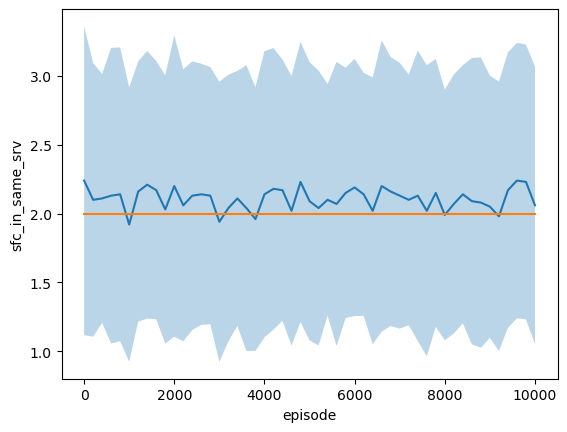

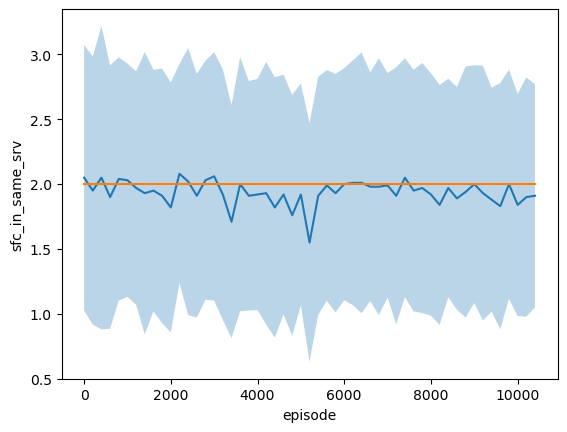

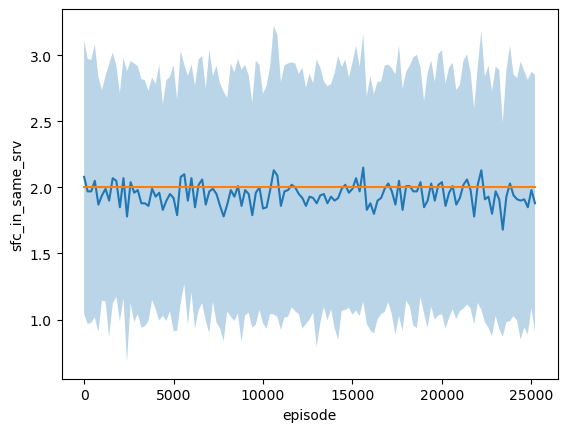

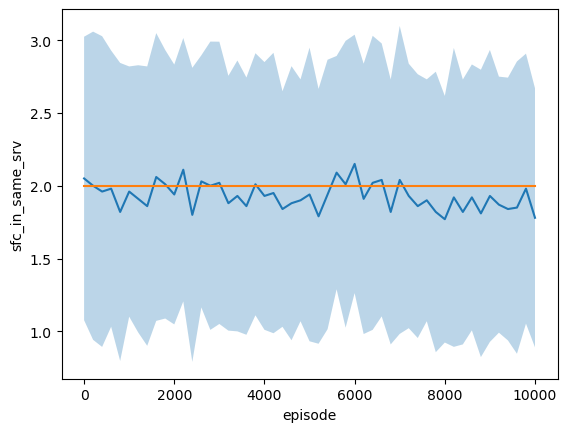

In [5]:
for i in range(1, 9):
    df = pd.read_csv(f'../result/ppo/edge_load=0.{i}_debug_info.csv')
    df.head()

    np_mean_final_sfc_in_same_srv = df['mean_100_final_sfc_in_same_srv'].to_numpy()
    
    np_std_final_sfc_in_same_srv = df['std_100_final_sfc_in_same_srv'].to_numpy()

    np_upper_final_sfc_in_same_srv = np_mean_final_sfc_in_same_srv + np_std_final_sfc_in_same_srv
    np_lower_final_sfc_in_same_srv = np_mean_final_sfc_in_same_srv - np_std_final_sfc_in_same_srv

    b_df = pd.read_csv(f'../result/baseline-rule/0.{i}_debug_info.csv')
    b_mean_rewards = b_df['mean_100_final_sfc_in_same_srv'].to_numpy()
    b_mean_rewards = b_mean_rewards.repeat(len(np_mean_final_sfc_in_same_srv))

    episodes = np.arange(len(np_mean_final_sfc_in_same_srv)) * 200

    plt.fill_between(episodes, np_lower_final_sfc_in_same_srv, np_upper_final_sfc_in_same_srv, alpha=0.3)
    plt.plot(episodes, np_mean_final_sfc_in_same_srv, label='mean sfc_in_same_srv')
    plt.plot(episodes, b_mean_rewards, label='baseline sfc_in_same_srv')

    plt.xlabel('episode')
    plt.ylabel('sfc_in_same_srv')

    plt.show()

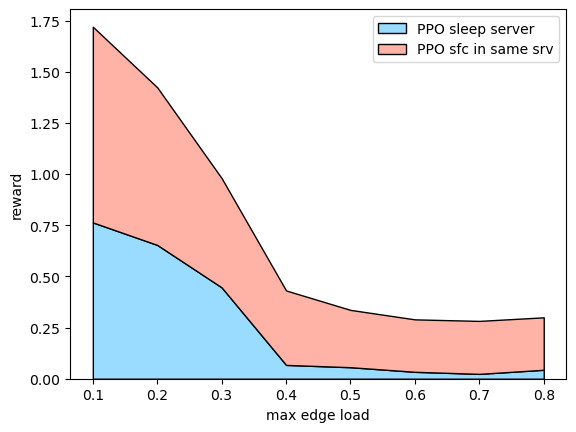

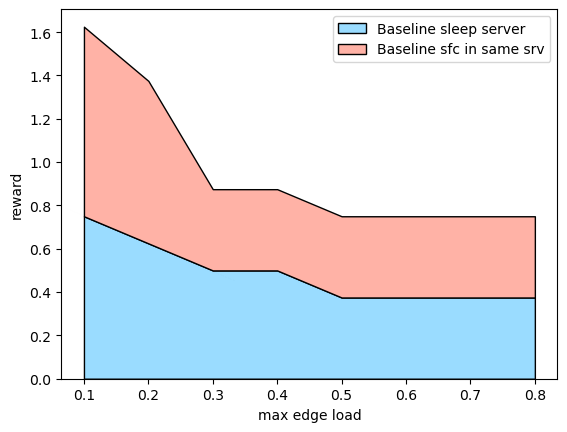

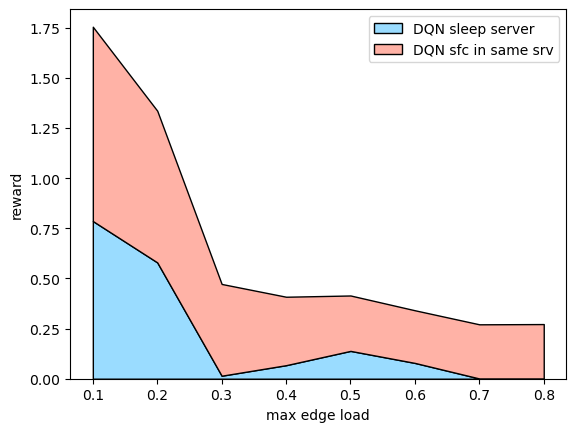

In [27]:
max_edge_loads = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

ppo_max_rewards = []
ppo_max_fin_slp_srvs = []
ppo_max_fin_sfc_in_same_srvs = []
b_max_rewards = []
b_max_fin_slp_srvs = []
b_max_fin_sfc_in_same_srvs = []
dqn_max_rewards = []
dqn_max_fin_slp_srvs = []
dqn_max_fin_sfc_in_same_srvs = []
for max_edge_load in max_edge_loads:
    df = pd.read_csv(f'../result/ppo/edge_load={max_edge_load}_debug_info.csv')
    max_rewards = df['mean_100_reward'].to_numpy().max()
    max_rewards_idx = df['mean_100_reward'].to_numpy().argmax()

    max_mean_final_slp_srv = df['mean_100_final_slp_srv'].to_numpy()[max_rewards_idx] / 8.0
    max_mean_final_sfc_in_same_srv = df['mean_100_final_sfc_in_same_srv'].to_numpy()[max_rewards_idx] / 8.0
    mean_rewards = df['mean_100_reward'].to_numpy()

    max_rewards = max_mean_final_slp_srv + max_mean_final_sfc_in_same_srv

    ppo_max_rewards.append(max_rewards)
    ppo_max_fin_slp_srvs.append(max_mean_final_slp_srv)
    ppo_max_fin_sfc_in_same_srvs.append(max_mean_final_sfc_in_same_srv)
    
    b_df = pd.read_csv(f'../result/baseline-rule/{max_edge_load}_debug_info.csv')
    max_rewards = b_df['mean_100_reward'].to_numpy().max()
    max_rewards_idx = b_df['mean_100_reward'].to_numpy().argmax()

    b_mean_final_slp_srv = b_df['mean_100_final_slp_srv'].to_numpy()[max_rewards_idx] / 8.0
    b_mean_final_sfc_in_same_srv = b_df['mean_100_final_sfc_in_same_srv'].to_numpy()[max_rewards_idx] / 8.0

    b_max_rewards.append(b_mean_final_slp_srv + b_mean_final_sfc_in_same_srv)
    b_max_fin_slp_srvs.append(b_mean_final_slp_srv)
    b_max_fin_sfc_in_same_srvs.append(b_mean_final_sfc_in_same_srv)

    dqn_df = pd.read_csv(f'../result/dqn/edge_load={max_edge_load}_debug_info.csv')
    max_rewards = dqn_df['mean_100_reward'].to_numpy().max()
    max_rewards_idx = dqn_df['mean_100_reward'].to_numpy().argmax()

    dqn_max_mean_final_slp_srv = dqn_df['mean_100_final_slp_srv'].to_numpy()[-1] / 8.0
    dqn_max_mean_final_sfc_in_same_srv = dqn_df['mean_100_final_sfc_in_same_srv'].to_numpy()[-1] / 8.0
    dqn_mean_rewards = dqn_df['mean_100_reward'].to_numpy()

    dqn_max_reward = dqn_max_mean_final_slp_srv + dqn_max_mean_final_sfc_in_same_srv

    dqn_max_rewards.append(dqn_max_reward)
    dqn_max_fin_slp_srvs.append(dqn_max_mean_final_slp_srv)
    dqn_max_fin_sfc_in_same_srvs.append(dqn_max_mean_final_sfc_in_same_srv)


plt.stackplot(max_edge_loads, ppo_max_fin_slp_srvs, ppo_max_fin_sfc_in_same_srvs, labels=['PPO sleep server', 'PPO sfc in same srv'], colors=["#9adcff", "#ffb2a6"], edgecolor='black')

plt.xlabel('max edge load')
plt.ylabel('reward')
plt.legend()

plt.show()

plt.stackplot(max_edge_loads, b_max_fin_slp_srvs, b_max_fin_sfc_in_same_srvs, labels=['Baseline sleep server', 'Baseline sfc in same srv'], colors=["#9adcff", "#ffb2a6"], edgecolor='black')

plt.xlabel('max edge load')
plt.ylabel('reward')
plt.legend()

plt.show()

plt.stackplot(max_edge_loads, dqn_max_fin_slp_srvs, dqn_max_fin_sfc_in_same_srvs, labels=['DQN sleep server', 'DQN sfc in same srv'], colors=["#9adcff", "#ffb2a6"], edgecolor='black')

plt.xlabel('max edge load')
plt.ylabel('reward')
plt.legend()

plt.show()

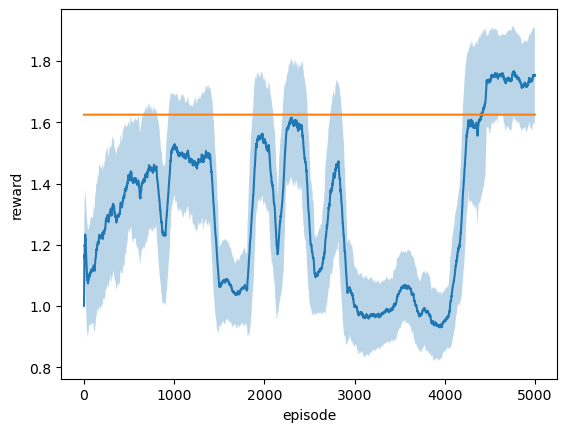

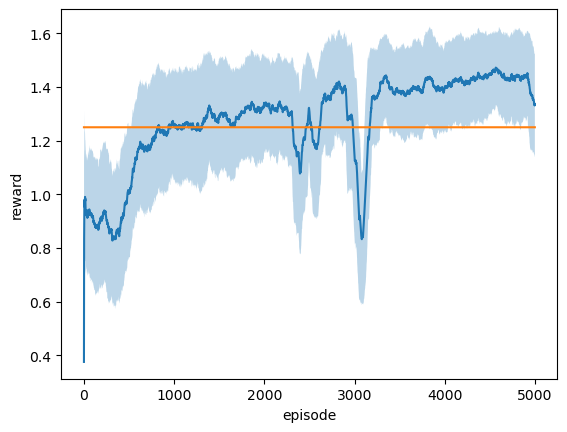

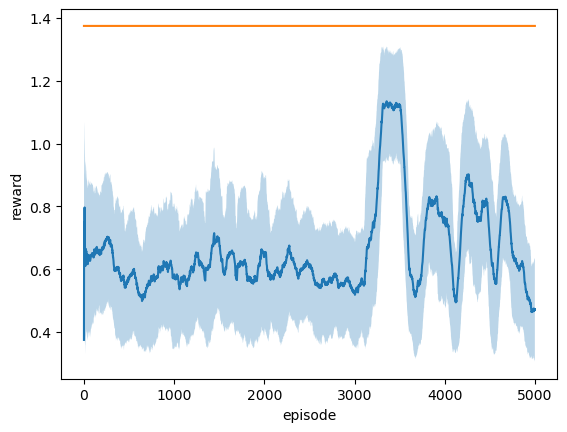

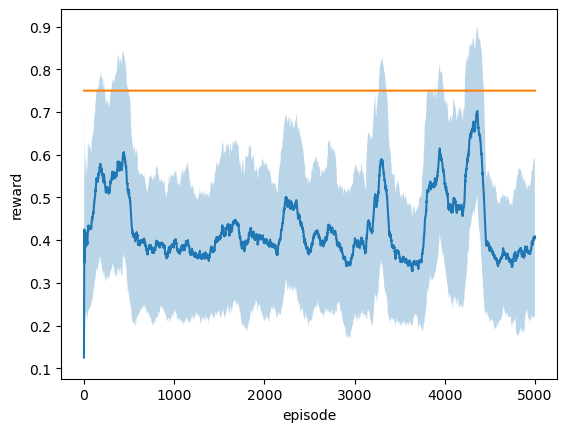

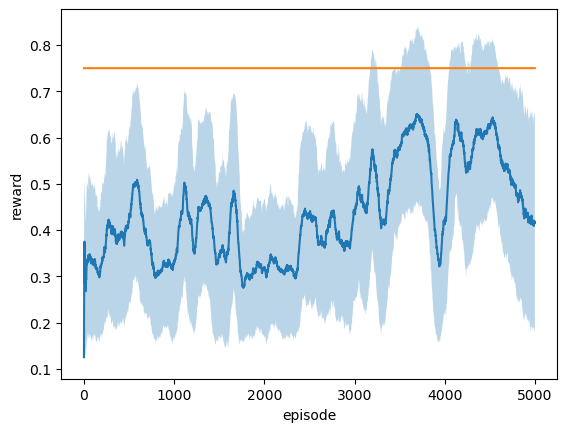

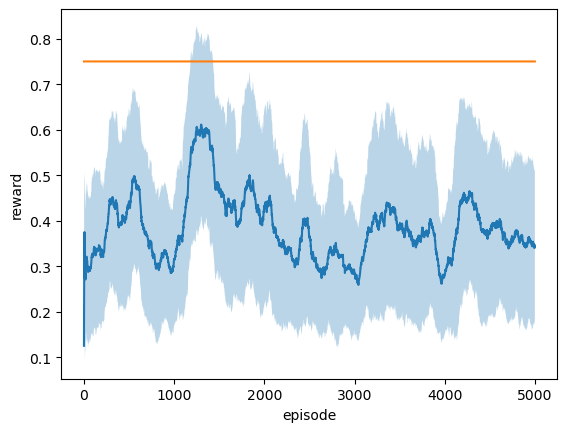

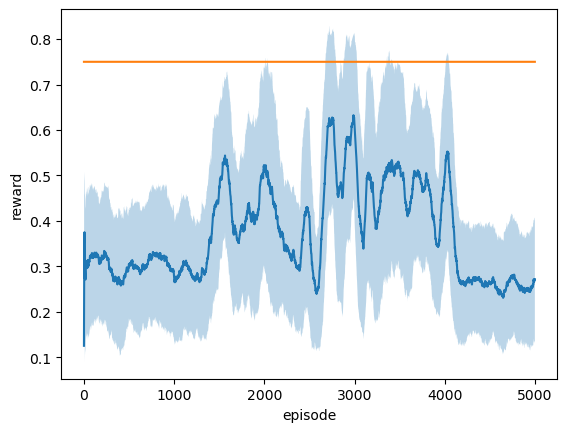

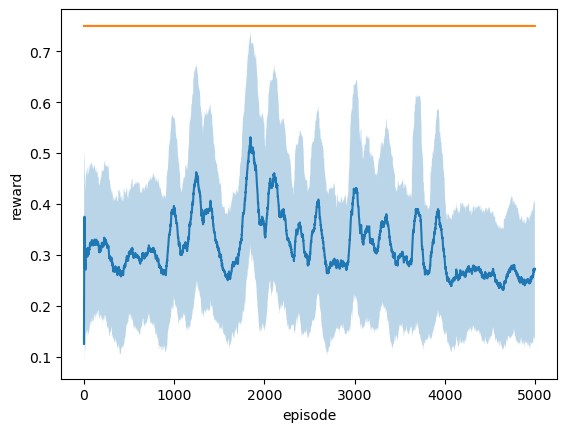

In [8]:
for i in range(1, 9):
    df = pd.read_csv(f'../result/dqn/edge_load=0.{i}_debug_info.csv')
    df.head()

    np_mean_rewards = df['mean_100_reward'].to_numpy()
    np_std_rewards = df['std_100_reward'].to_numpy()
    

    np_upper_rewards = np_mean_rewards + np_std_rewards
    np_lower_rewards = np_mean_rewards - np_std_rewards

    b_df = pd.read_csv(f'../result/baseline-rule/0.{i}_debug_info.csv')
    b_mean_rewards = b_df['mean_100_reward'].to_numpy()
    b_mean_rewards = b_mean_rewards.repeat(len(np_mean_rewards))
    episodes = np.arange(len(np_mean_rewards))
    
    plt.fill_between(episodes, np_lower_rewards, np_upper_rewards, alpha=0.3)
    plt.plot(episodes, np_mean_rewards, label='mean reward')
    plt.plot(episodes, b_mean_rewards, label='baseline reward')

    plt.xlabel('episode')
    plt.ylabel('reward')

    plt.show()

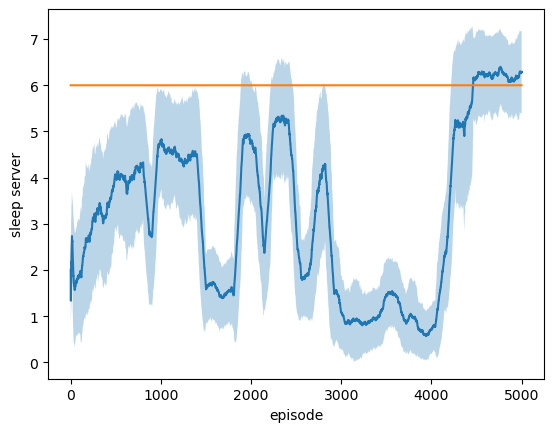

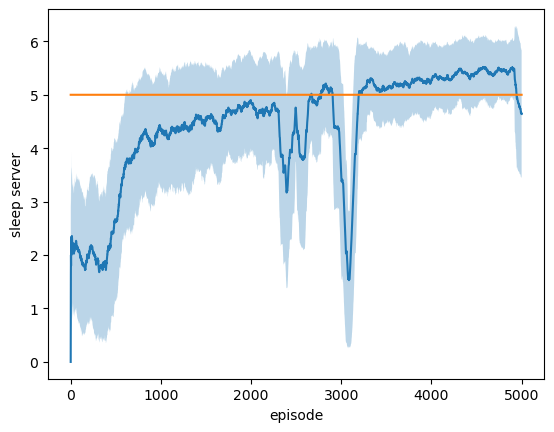

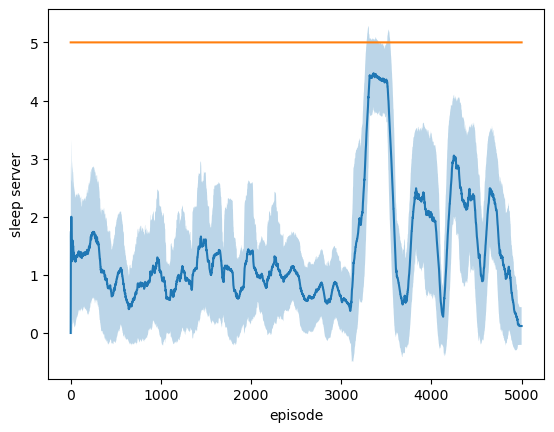

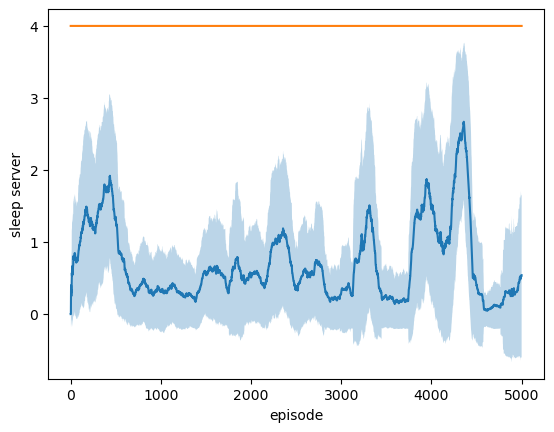

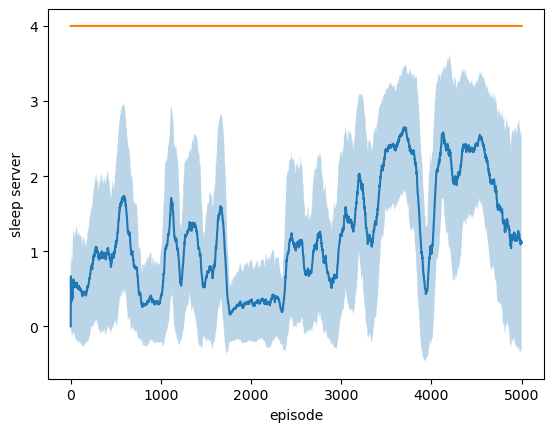

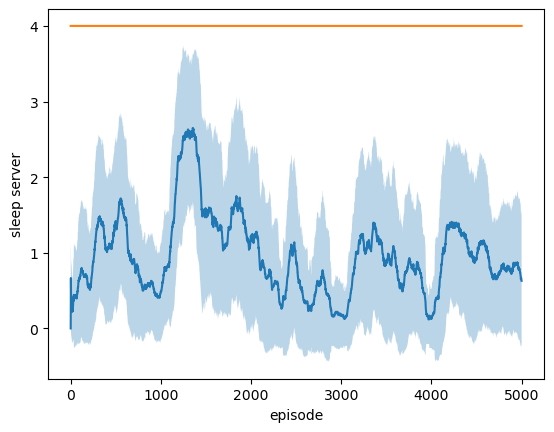

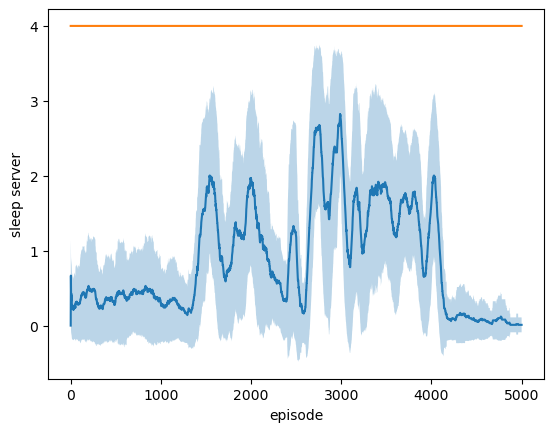

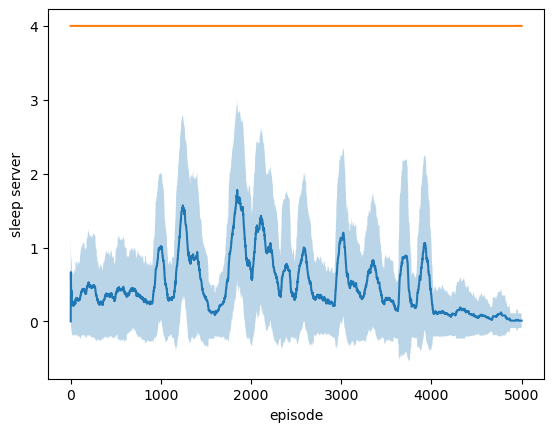

In [9]:
for i in range(1, 9):
    df = pd.read_csv(f'../result/dqn/edge_load=0.{i}_debug_info.csv')
    df.head()

    np_mean_final_slp_srv = df['mean_100_final_slp_srv'].to_numpy()
    np_std_final_slp_srv = df['std_100_final_slp_srv'].to_numpy()

    np_upper_final_slp_srv = np_mean_final_slp_srv + np_std_final_slp_srv
    np_lower_final_slp_srv = np_mean_final_slp_srv - np_std_final_slp_srv

    b_df = pd.read_csv(f'../result/baseline-rule/0.{i}_debug_info.csv')
    b_mean_rewards = b_df['mean_100_final_slp_srv'].to_numpy()
    b_mean_rewards = b_mean_rewards.repeat(len(np_mean_final_slp_srv))

    episodes = np.arange(len(np_mean_final_slp_srv))

    plt.fill_between(episodes, np_lower_final_slp_srv, np_upper_final_slp_srv, alpha=0.3)
    plt.plot(episodes, np_mean_final_slp_srv, label='mean sleep server')
    plt.plot(episodes, b_mean_rewards, label='baseline sleep server')

    plt.xlabel('episode')
    plt.ylabel('sleep server')

    plt.show()

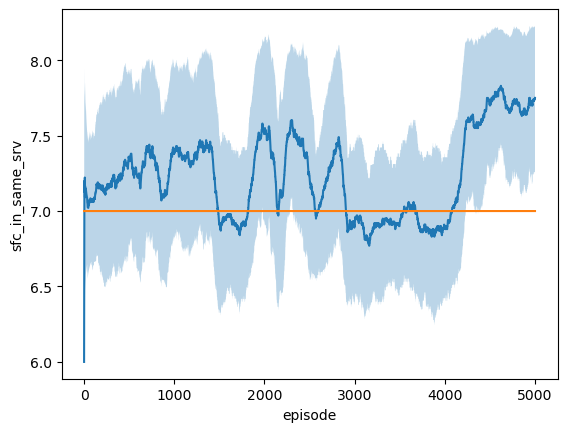

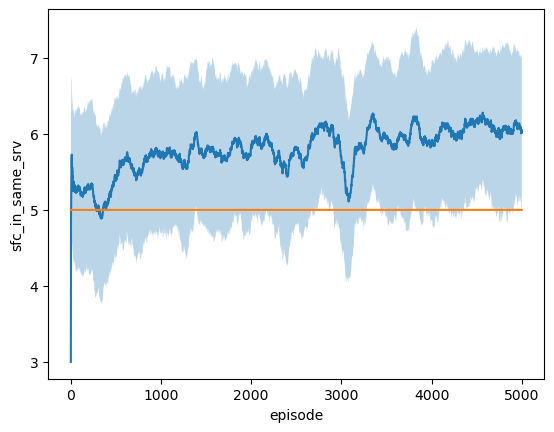

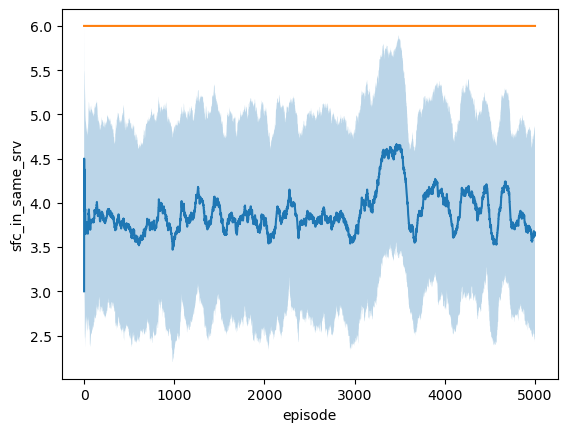

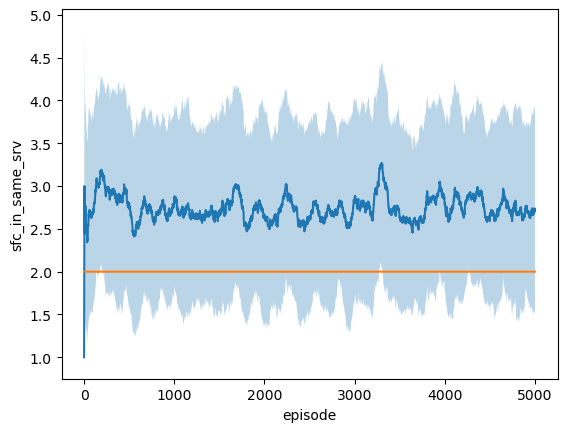

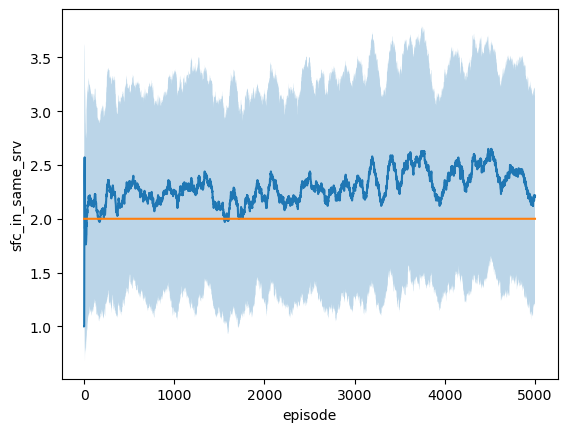

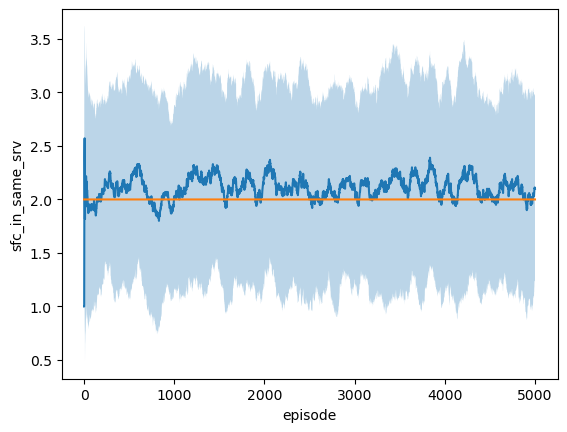

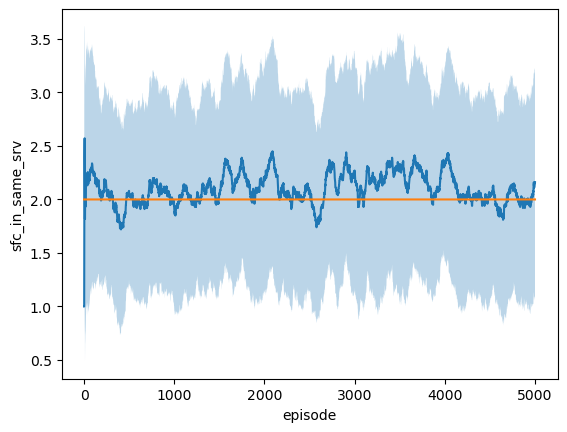

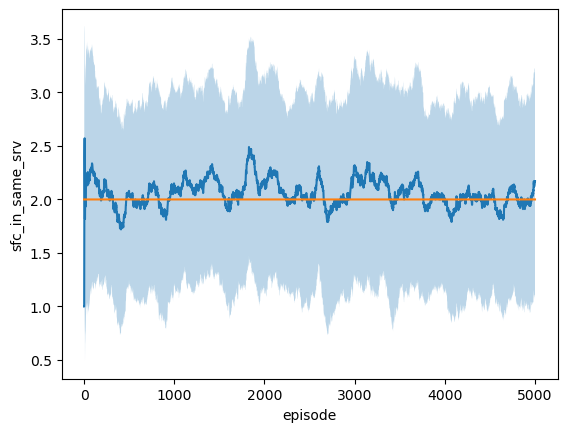

In [10]:
for i in range(1, 9):
    df = pd.read_csv(f'../result/dqn/edge_load=0.{i}_debug_info.csv')
    df.head()

    np_mean_final_sfc_in_same_srv = df['mean_100_final_sfc_in_same_srv'].to_numpy()
    
    np_std_final_sfc_in_same_srv = df['std_100_final_sfc_in_same_srv'].to_numpy()

    np_upper_final_sfc_in_same_srv = np_mean_final_sfc_in_same_srv + np_std_final_sfc_in_same_srv
    np_lower_final_sfc_in_same_srv = np_mean_final_sfc_in_same_srv - np_std_final_sfc_in_same_srv

    b_df = pd.read_csv(f'../result/baseline-rule/0.{i}_debug_info.csv')
    b_mean_rewards = b_df['mean_100_final_sfc_in_same_srv'].to_numpy()
    b_mean_rewards = b_mean_rewards.repeat(len(np_mean_final_sfc_in_same_srv))

    episodes = np.arange(len(np_mean_final_sfc_in_same_srv))

    plt.fill_between(episodes, np_lower_final_sfc_in_same_srv, np_upper_final_sfc_in_same_srv, alpha=0.3)
    plt.plot(episodes, np_mean_final_sfc_in_same_srv, label='mean sfc_in_same_srv')
    plt.plot(episodes, b_mean_rewards, label='baseline sfc_in_same_srv')

    plt.xlabel('episode')
    plt.ylabel('sfc_in_same_srv')

    plt.show()

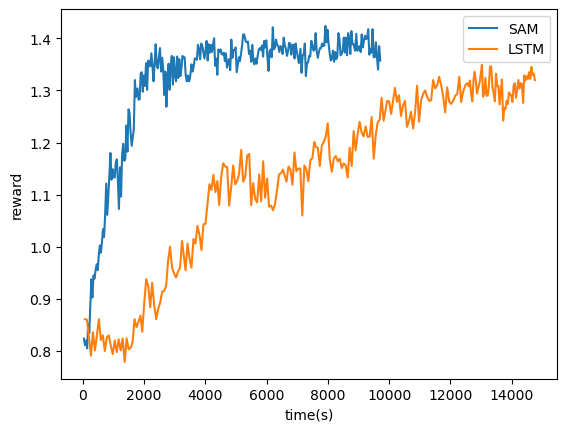

In [11]:
dfs = [pd.read_csv(f'../result/ppo/edge_load=0.2_debug_info.csv'), pd.read_csv(f'../result/ppo/edge_load=0.2_debug_info_2.csv')]
names = ['SAM', 'LSTM']

now = datetime.datetime.now().strftime('%Y-%m-%d')
now = datetime.datetime.strptime(now, '%Y-%m-%d')

# duration = pd.to_datetime(df['timestamp']).map(lambda x: (x - now).seconds)

for df, name in zip(dfs, names):
    timestamp = pd.to_datetime(df['timestamp']).map(lambda x: (x - now).seconds).to_numpy()
    mean_rewards = df['mean_100_reward'].to_numpy()
    rewards = []
    for reward in mean_rewards:
        rewards.append(float(reward[7:-1]))
    rewards = np.array(rewards)

    plt.plot(timestamp, rewards, label=name)

plt.xlabel('time(s)')
plt.ylabel('reward')
plt.legend()
plt.show()

In [12]:
# pd.to_datetime(df['timestamp']).map(lambda x: int(x.strftime('%Y%m%d%H%M%S')))[0] - int(datetime.datetime.now().strftime('%Y%m%d') + '000000')

# pd.to_datetime(df['timestamp']).map(lambda x: int(x.strftime('%Y%m%d%H%M%S')))[0] - int(datetime.datetime.now().strftime('%Y%m%d') + '000000')

now = datetime.datetime.now().strftime('%Y-%m-%d')
now = datetime.datetime.strptime(now, '%Y-%m-%d')

duration = pd.to_datetime(df['timestamp']).map(lambda x: (x - now).seconds)




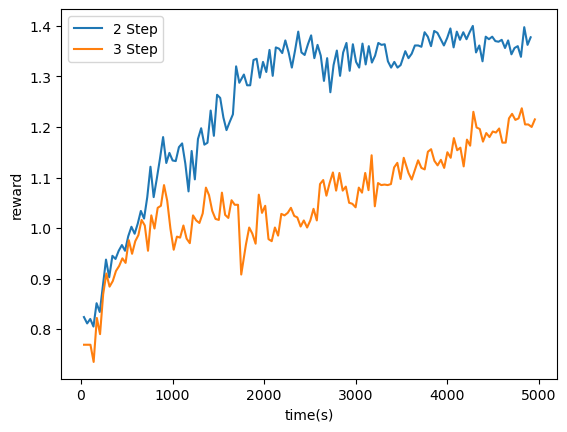

In [13]:
dfs = [pd.read_csv(f'../result/ppo/edge_load=0.2_debug_info.csv'), pd.read_csv(f'../result/ppo/edge_load=0.2_debug_info_3.csv')]
names = ['2 Step', '3 Step']

now = datetime.datetime.now().strftime('%Y-%m-%d')
now = datetime.datetime.strptime(now, '%Y-%m-%d')

# duration = pd.to_datetime(df['timestamp']).map(lambda x: (x - now).seconds)

for df, name in zip(dfs, names):
    timestamp = pd.to_datetime(df['timestamp']).map(lambda x: (x - now).seconds).to_numpy()
    mean_rewards = df['mean_100_reward'].to_numpy()
    rewards = []
    for reward in mean_rewards:
        rewards.append(float(reward[7:-1]))
    rewards = np.array(rewards)

    plt.plot(timestamp[:140], rewards[:140], label=name)

plt.xlabel('time(s)')
plt.ylabel('reward')
plt.legend()
plt.show()